# <span style="color:green; font-family:Arial, sans-serif; font-weight:bold;"><u><center> Goods and Services Tax Classification</center></u></span>

<h2 style='color:Orange'>Project Summary</h2>

In this project, participants are provided with a dataset to develop machine learning models aimed at predicting a specific target variable (0 or 1). The dataset includes various attributes selected by subject matter experts (SMEs) to capture relevant information for the task. The data has been pre-processed, handling issues like missing values, normalization, and encoding categorical features. This pre-processing ensures the data is clean, allowing participants to focus on model development without worrying about data quality problems.

The dataset is divided into three parts:

* Training Set (60%): Used for building and training models.
* Testing Set (20%): For evaluating model performance during development.
* Validation Set (20%): Held by GSTN for the final unbiased evaluation of submitted models.
  
The training data includes 78,000 records where the target is 1 (positive class) and 540,000 records where the target is 0 (negative class). A similar distribution is found in the test data. Participants need to create models that can predict the target accurately, despite the challenge of class imbalance.

After the first round of model submissions, selected participants will move to the next phase, where they can improve their models using additional attributes and insights from GSTN experts. External data can also be used to enhance feature engineering and model performance. Final evaluations will be based on the validation set, ensuring fair and unbiased model assessment.

<h2 style='color:orange'>Problem Statements</h2>

The main challenge in this project is the **severe class imbalance** in the dataset. Approximately **91%** of the data is labeled as **0** (negative class), while only **9%** is labeled as **1** (positive class). This imbalance makes it difficult for machine learning models to identify and predict the minority class (1) accurately because most models tend to favor the majority class (0).

The problem can be summarized as:

**How can we build a model that accurately predicts the minority class (1), despite the overwhelming presence of the majority class (0)?
To address this, participants can explore techniques like:**

**Oversampling** the minority class (increasing the number of 1 samples).

**Undersampling** the majority class (reducing the number of 0 samples).

Using advanced methods like **ensemble learning, cost-sensitive models, or synthetic data generation (such as SMOTE).**

Additionally, instead of relying on accuracy, participants should focus on metrics that better handle imbalanced data, like **precision, recall, F1-score, and ROC-AUC**. These metrics will provide a clearer picture of how well the model handles the minority class (1) predictions, which is crucial for success in this challenge.

### **Importing the necessary libraries**

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn import tree
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import joblib

<h2 style='color:orange'>Data Gathering</h2>

In [116]:
train1=pd.read_csv(r'/content/drive/MyDrive/GST/Train_60/X_Train_Data_Input.csv')

In [117]:
train2=pd.read_csv(r'/content/drive/MyDrive/GST/Train_60/Y_Train_Data_Target.csv')

In [118]:
train1.head(2)

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0


In [119]:
train2.head(2)

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0


In [120]:
df=pd.merge(train1,train2,on='ID')

<h2 style='color:orange'>Data Exploration and Data Cleaning</h2>

In [121]:
df.columns

Index(['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'target'],
      dtype='object')

In [122]:
df.shape

(785133, 24)

In [124]:
df.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,785124.000000,785133.000000,785133.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,52996.000000,...,785133.000000,419430.000000,768677.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.005245,...,0.328285,-0.000863,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757,0.094294
std,1.163275,907.267965,2143.140140,0.999935,1.000350,1.015255,0.998984,1.045883,1.056769,1.111058,...,0.469589,1.291202,1.283393,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439,0.292237
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,-0.086503,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,-0.063140,...,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

In [126]:
df=df.drop_duplicates()

In [127]:
df.shape

(785133, 24)

In [128]:
df.count()

,0
ID,785133
Column0,785124
Column1,785133
Column2,785133
Column3,658830
Column4,657423
Column5,617953
Column6,781283
Column7,785133
Column8,781283


In [129]:
df.isnull().sum()

,0
ID,0
Column0,9
Column1,0
Column2,0
Column3,126303
Column4,127710
Column5,167180
Column6,3850
Column7,0
Column8,3850


In [130]:
cols_to_fill = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column9', 'Column10', 'Column14', 'Column15']
df[cols_to_fill] = df[cols_to_fill].fillna(df[cols_to_fill].median())

In [131]:
df.isnull().sum()

,0
ID,0
Column0,0
Column1,0
Column2,0
Column3,0
Column4,0
Column5,0
Column6,0
Column7,0
Column8,0


<h2 style='color:orange'>Data Visualization</h2>

**1.)Pie plot of target columns.**

In [133]:
df.target.value_counts()

,count
target,
0,711100
1,74033


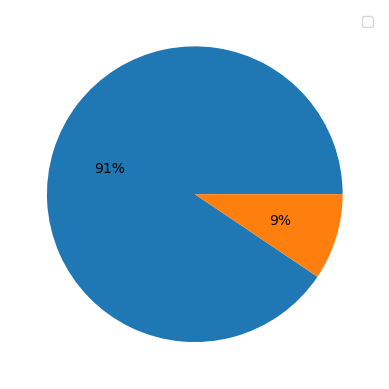

In [134]:
values=df['target'].value_counts().values
plt.pie(values,autopct='%1.0f%%')
plt.legend()
plt.show()

**(2) Correlation Heatmap Visualization.**

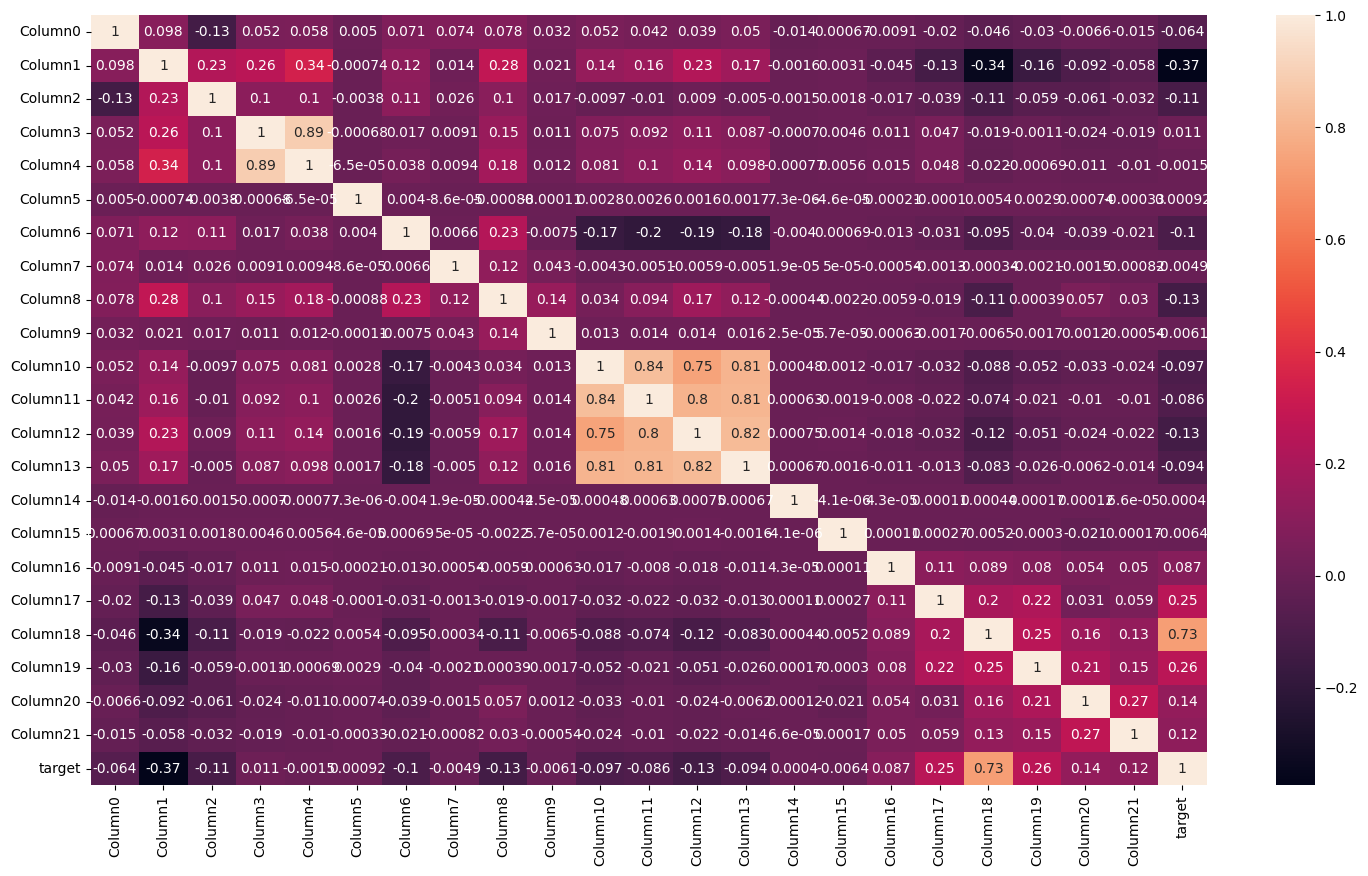

In [135]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True);

---

### **Describe the Dataset and removing outliers**

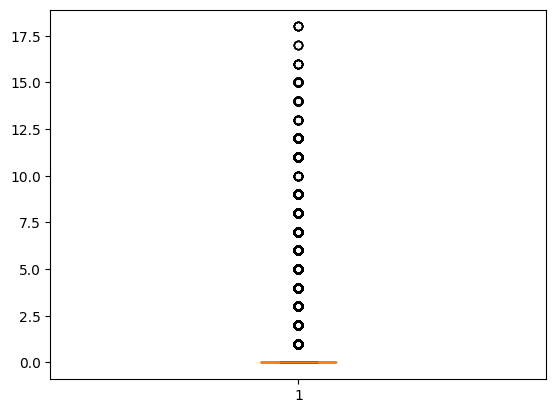

In [136]:
plt.boxplot(x=df['Column0'])
plt.show()

In [137]:
df.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,...,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440752,1321.788614,2951.279411,0.108915,0.113375,-0.001880,-0.002706,0.000727,0.000441,-0.075943,...,0.328285,0.000168,-0.000748,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757,0.094294
std,1.163269,907.267965,2143.140140,0.949283,0.951365,0.900707,0.996937,1.045883,1.054210,0.289483,...,0.469589,0.943740,1.269872,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439,0.292237
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,-0.088554,...,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,0.001462,-0.321449,-0.007469,-0.407939,-0.015607,-0.774979,-0.081820,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,-0.081820,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.369651,-0.015607,0.622601,-0.081820,...,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000,1.000000


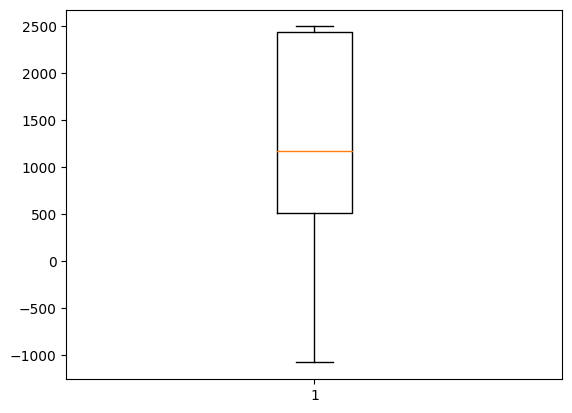

In [138]:
plt.boxplot(x=df['Column1'])
plt.show()

**Outlier detection and removal using Z-Score**

In [139]:
df['zscore']=(df.Column1 - df.Column1.mean()) / df.Column1.std()
df.head(5)

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,1.0,0,0,0,1,-1.224323
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-0.665502


In [140]:
df[df['zscore']>3]

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore


In [141]:
df[df['zscore']<-2]

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
232954,8cf4cad9b2fd5b08ee1588ef31370b61,0.0,-942,6004.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-2.495171
349340,e465f2b2b488e8bce7be41eed5b98f6f,0.0,-936,3300.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,1.0,0,0,0,1,-2.488558
473036,e11b63f7875560ffdc559356eec29f12,0.0,-926,4611.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-2.477536
645451,50ea06f61ce1736e034bf86116e26f17,0.0,-909,7621.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,1.0,0,0,0,1,-2.458798
769392,4c158ed2cfe2d0c64f9d3fc00998ec53,2.0,-921,1215.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-2.472024
773882,df542cdc096ed3f777feb9c3a5616973,0.0,-1080,6629.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-2.647276


In [142]:
df.zscore.describe()

,zscore
count,7.851330e+05
mean,-4.689693e-17
std,1.000000e+00
min,-2.647276e+00
25%,-8.892506e-01
50%,-1.639963e-01
75%,1.226993e+00
max,1.297534e+00


In [143]:
df[(df.zscore<-2) | (df.zscore>3)]

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
232954,8cf4cad9b2fd5b08ee1588ef31370b61,0.0,-942,6004.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-2.495171
349340,e465f2b2b488e8bce7be41eed5b98f6f,0.0,-936,3300.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,1.0,0,0,0,1,-2.488558
473036,e11b63f7875560ffdc559356eec29f12,0.0,-926,4611.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-2.477536
645451,50ea06f61ce1736e034bf86116e26f17,0.0,-909,7621.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,1.0,0,0,0,1,-2.458798
769392,4c158ed2cfe2d0c64f9d3fc00998ec53,2.0,-921,1215.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-2.472024
773882,df542cdc096ed3f777feb9c3a5616973,0.0,-1080,6629.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-2.647276


Remove the outliers

In [144]:
df_no_outliers=df[(df.zscore>-2) & (df.zscore<3)]

In [145]:
df_no_outliers.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,1.0,0,0,0,1,-1.224323
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-0.665502


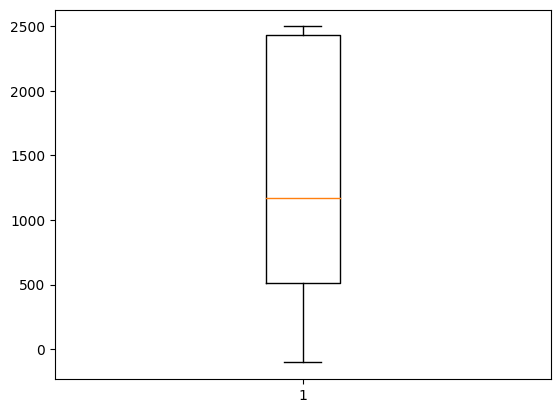

In [146]:
plt.boxplot(x=df_no_outliers['Column1'])
plt.show()

In [147]:
df_no_outliers.shape

(785127, 25)

In [148]:
df.shape

(785133, 25)

In [149]:
GST=pd.merge(df, df_no_outliers[['ID']], on='ID', how='inner')

In [150]:
GST.columns

Index(['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'target', 'zscore'],
      dtype='object')

In [151]:
GST.drop('zscore',axis=1)

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0.001351,0.00339,0.0,0,1.0,0,0,0,1
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0.001351,0.00339,0.0,0,1.0,0,0,0,0
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
785125,fe5b1826c9e7c1864886b233402df330,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0


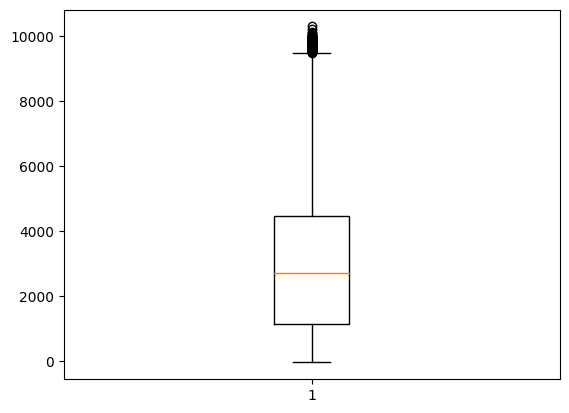

In [152]:
plt.boxplot(x=GST['Column2'])
plt.show()

In [153]:
GST.shape

(785127, 25)

**Using IQR technique**

In [154]:
def iqr_techniques(DFcolumns):
    Q1=np.percentile(DFcolumns,25)
    Q3=np.percentile(DFcolumns,75)
    IQR=Q3-Q1
    lower_range=Q1 - (1.5*IQR)
    upper_range=Q3 + (1.5*IQR)
    return lower_range,upper_range

In [155]:
lower_bond,upper_bond=iqr_techniques(GST['Column2'])

In [156]:
GST=GST[(GST['Column2']>lower_bond) & (GST['Column2']<upper_bond)]


In [157]:
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,1.0,0,0,0,1,-1.224323
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-0.665502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
785125,fe5b1826c9e7c1864886b233402df330,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.276592


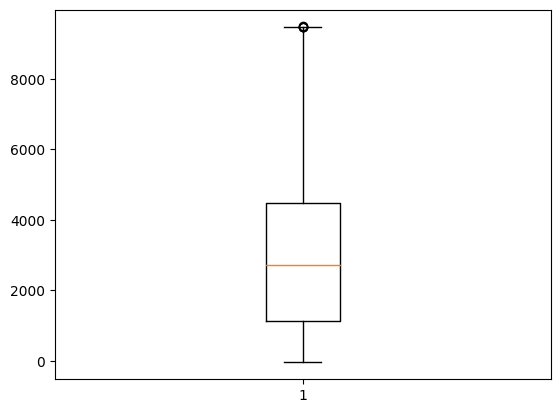

In [158]:
plt.boxplot(x=GST['Column2'])
plt.show()

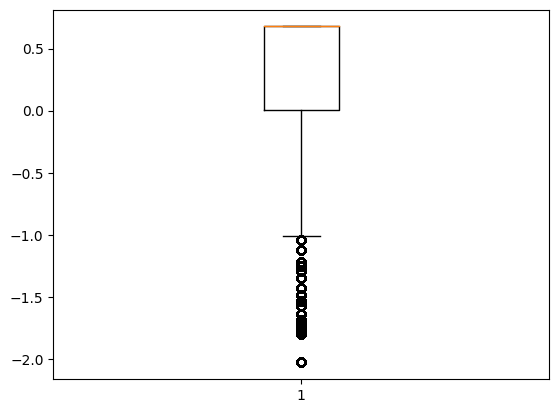

In [159]:
plt.boxplot(x=GST['Column3'])
plt.show()

In [160]:
lower_bond,upper_bond=iqr_techniques(GST['Column3'])

In [161]:
GST=GST[(GST['Column3']>lower_bond) & (GST['Column3']<upper_bond)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,1.0,0,0,0,1,-1.224323
7,35de3c8468023ca3cecdcc99f60c2c3d,0.0,2495,3053.0,0.678139,0.701403,-0.007468,-0.094001,-0.015605,0.136592,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-0.732737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
785125,fe5b1826c9e7c1864886b233402df330,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.276592


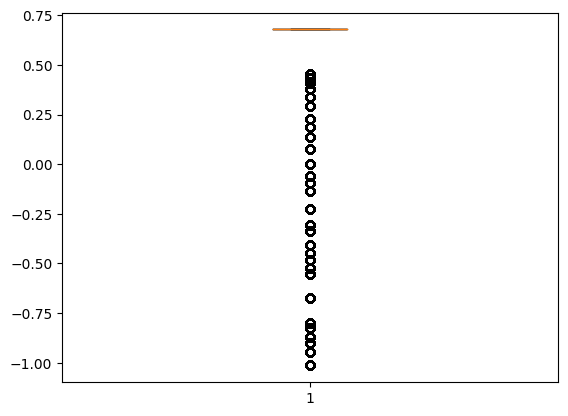

In [162]:
plt.boxplot(x=GST['Column3'])
plt.show()

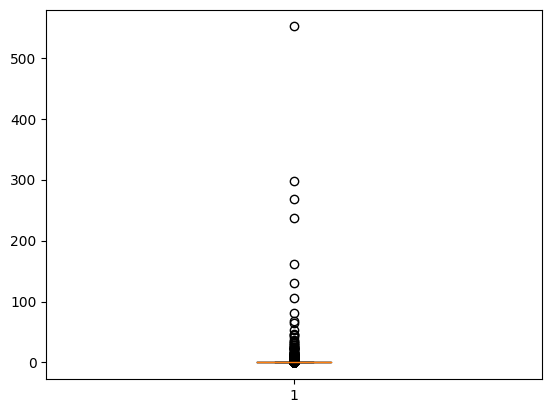

In [163]:
plt.boxplot(x=GST['Column5'])
plt.show()

In [164]:
lower_bond,upper_bond=iqr_techniques(GST['Column5'])

In [165]:
GST=GST[(GST['Column5']>lower_bond) & (GST['Column5']<upper_bond)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,1.0,0,0,0,1,-1.224323
7,35de3c8468023ca3cecdcc99f60c2c3d,0.0,2495,3053.0,0.678139,0.701403,-0.007468,-0.094001,-0.015605,0.136592,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,-0.732737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.00339,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.293126
785125,fe5b1826c9e7c1864886b233402df330,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,...,0.001351,0.00339,0.0,0,0.0,0,0,0,0,1.276592


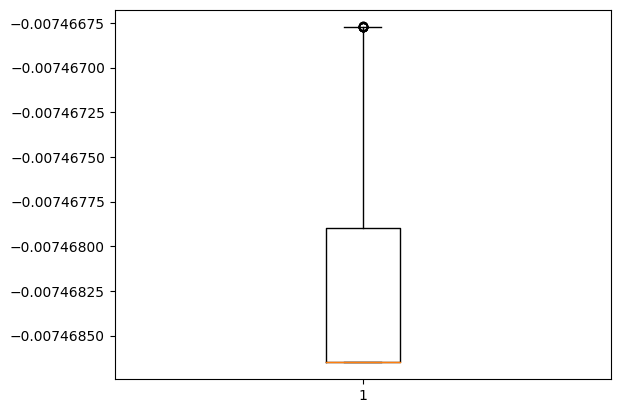

In [166]:
plt.boxplot(x=GST['Column5'])
plt.show()

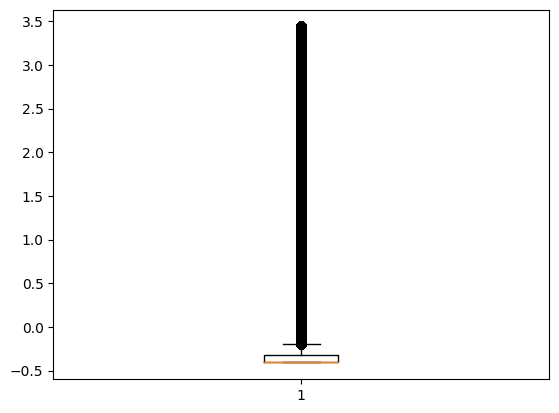

In [167]:
plt.boxplot(x=GST['Column6'])
plt.show()

In [168]:
lower_bond,upper_bond=iqr_techniques(GST['Column6'])

In [169]:
GST=GST[(GST['Column6']>lower_bond) & (GST['Column6']<upper_bond)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


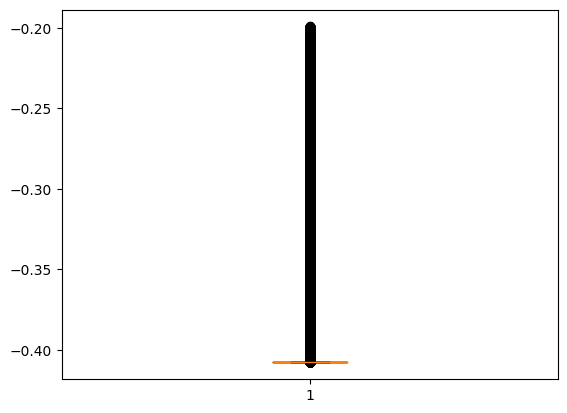

In [170]:

plt.boxplot(x=GST['Column6'])
plt.show()

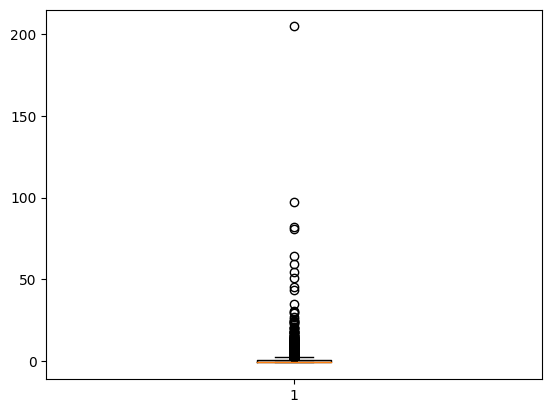

In [171]:
plt.boxplot(x=GST['Column8'])
plt.show()

In [172]:
GST.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
count,507894.000000,507894.000000,507894.000000,507894.000000,507894.000000,5.078940e+05,507894.000000,507894.000000,507894.000000,507894.000000,...,507894.000000,507894.000000,507894.000000,507894.000000,507894.000000,507894.000000,507894.000000,507894.000000,507894.000000,507894.000000
mean,0.414904,1324.563720,2881.338256,0.517778,0.462318,-7.468388e-03,-0.399931,-0.001061,-0.079843,-0.073096,...,0.001224,0.001646,0.001709,0.401318,0.172928,0.022920,0.011160,0.003192,0.118420,0.003059
std,1.142227,931.011416,2115.842105,0.369673,0.571076,4.073536e-07,0.030469,1.041400,0.915851,0.358703,...,0.095695,0.312610,0.041448,3.672796,0.461002,0.149649,0.105049,0.056404,0.323106,1.026170
min,0.000000,-104.000000,-6.000000,-1.013555,-1.855728,-7.468650e-03,-0.407939,-0.015607,-0.774979,-0.088554,...,-67.868433,-185.820400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.571519
25%,0.000000,476.000000,1088.000000,0.678139,0.701403,-7.468650e-03,-0.407939,-0.015607,-0.774979,-0.081820,...,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.932237
50%,0.000000,1229.000000,2623.000000,0.678139,0.701403,-7.468650e-03,-0.407939,-0.015607,-0.774951,-0.081820,...,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.102273
75%,0.000000,2441.000000,4364.000000,0.678139,0.701403,-7.467915e-03,-0.407939,-0.015607,0.560045,-0.081820,...,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.233606
max,18.000000,2499.000000,9485.000000,0.678139,0.701403,-7.466770e-03,-0.199102,201.687947,204.646025,133.911803,...,3.852235,0.012736,2.000000,219.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.297534


In [173]:
lower_bond,upper_bond=iqr_techniques(GST['Column8'])

In [174]:
GST=GST[(GST['Column8']>lower_bond) & (GST['Column8']<upper_bond)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


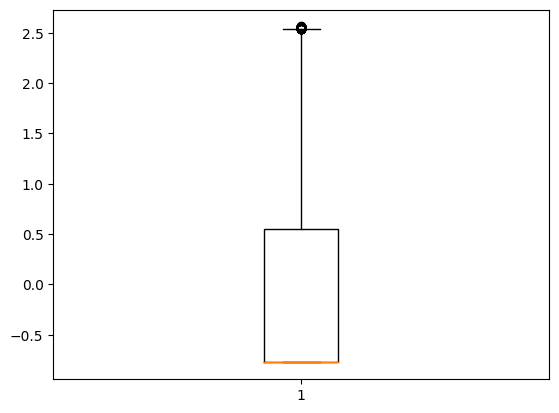

In [175]:
plt.boxplot(x=GST['Column8'])
plt.show()

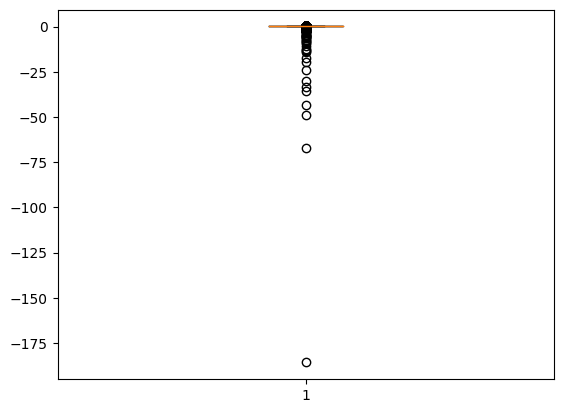

In [176]:
plt.boxplot(x=GST['Column15'])
plt.show()

**Outlier detection and removal using 3 standard deviation**

In [177]:
def ThreeStandardDeviation(DFcolumns):
    lower_limit=DFcolumns.mean()-3*DFcolumns.std()
    upper_limit=DFcolumns.mean()+3*DFcolumns.std()
    return lower_limit,upper_limit

In [178]:
lower_limit,upper_limit=ThreeStandardDeviation(GST['Column15'])

In [179]:
GST=GST[(GST['Column15']>lower_limit) & (GST['Column15']<upper_limit)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


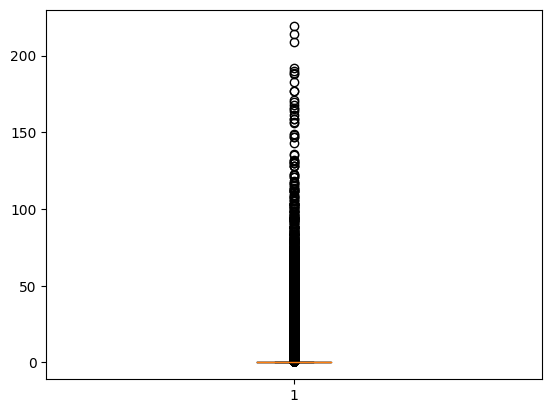

In [181]:
plt.boxplot(x=GST['Column17'])
plt.show()

In [182]:
lower_limit,upper_limit=ThreeStandardDeviation(GST['Column17'])

In [183]:
GST=GST[(GST['Column17']>lower_limit) & (GST['Column17']<upper_limit)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


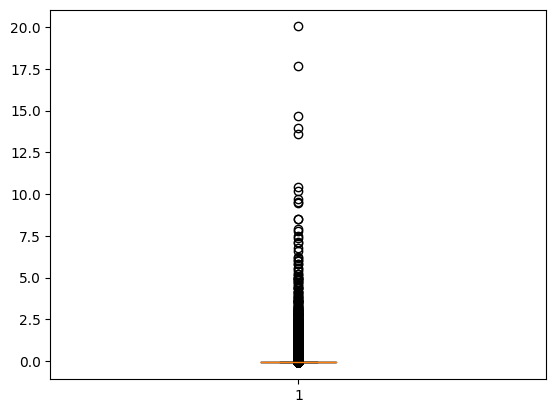

In [184]:
plt.boxplot(x=GST['Column9'])
plt.show()

In [185]:
lower_limit,upper_limit=ThreeStandardDeviation(GST['Column9'])

In [186]:
GST=GST[(GST['Column9']>lower_limit) & (GST['Column9']<upper_limit)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


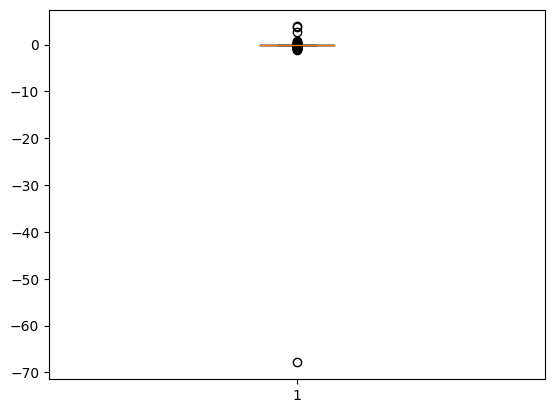

In [187]:

plt.boxplot(x=GST['Column14'])
plt.show()

In [188]:
lower_limit,upper_limit=ThreeStandardDeviation(GST['Column14'])

In [189]:
GST=GST[(GST['Column14']>lower_limit) & (GST['Column14']<upper_limit)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


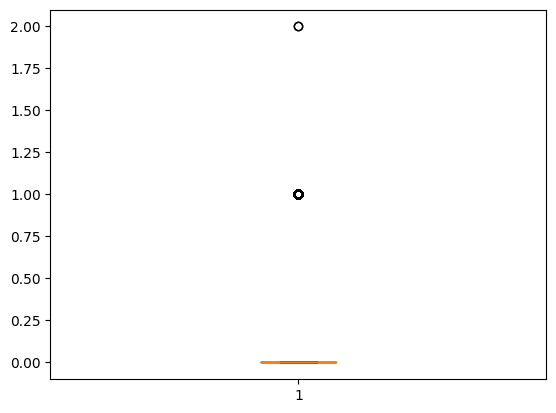

In [190]:
plt.boxplot(x=GST['Column16'])
plt.show()

In [191]:
lower_limit,upper_limit=ThreeStandardDeviation(GST['Column16'])

In [192]:
GST=GST[(GST['Column16']>lower_limit) & (GST['Column16']<upper_limit)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


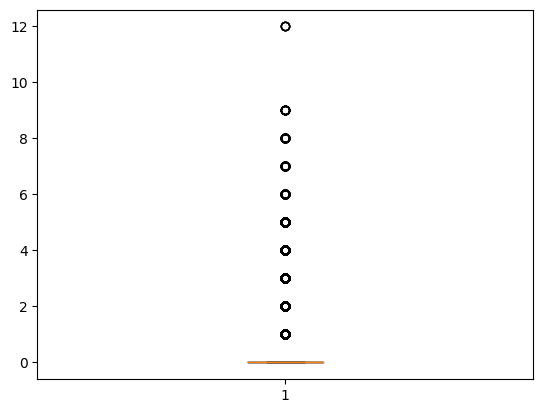

In [193]:
plt.boxplot(x=GST['Column18'])
plt.show()

In [194]:
lower_limit,upper_limit=ThreeStandardDeviation(GST['Column18'])

In [195]:
GST=GST[(GST['Column18']>lower_limit) & (GST['Column18']<upper_limit)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


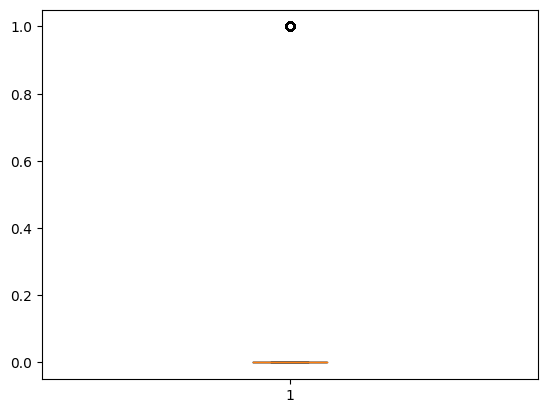

In [196]:
plt.boxplot(x=GST['Column19'])
plt.show()

In [197]:
lower_limit,upper_limit=ThreeStandardDeviation(GST['Column19'])

In [198]:
GST=GST[(GST['Column19']>lower_limit) & (GST['Column19']<upper_limit)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


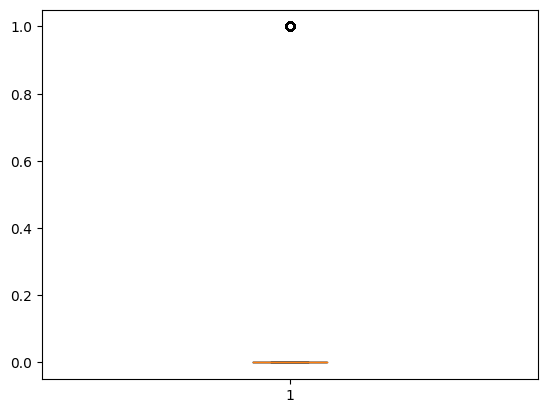

In [199]:
plt.boxplot(x=GST['Column20'])
plt.show()

In [200]:
lower_limit,upper_limit=ThreeStandardDeviation(GST['Column20'])

In [201]:
GST=GST[(GST['Column20']>lower_limit) & (GST['Column20']<upper_limit)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


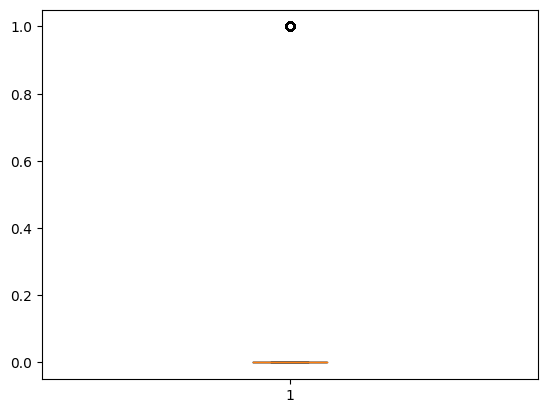

In [202]:
plt.boxplot(x=GST['Column21'])
plt.show()

In [203]:
lower_limit,upper_limit=ThreeStandardDeviation(GST['Column21'])

In [204]:
GST=GST[(GST['Column21']>lower_limit) & (GST['Column21']<upper_limit)]
GST

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target,zscore
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,1,-1.224323
8,9625a2859019d065054db34a70cacc0b,2.0,657,137.0,-0.404545,-0.321449,-0.007467,-0.407939,-0.015607,0.634026,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-0.732737
11,89ae5568e250d99f8594da0850e11682,0.0,1840,7337.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,0.571178
12,2d466ca023cc1a6405cd7d55d3b96ed2,0.0,293,1326.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,1.190023,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.133941
13,7e89371fbd2177f98398a07cc268a7f3,0.0,353,2907.0,0.227021,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,-1.067809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785120,5e3269d33fc64b76ed7600583249fef4,0.0,824,2703.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,...,0.001351,0.003391,0.0,0,1.0,0,0,0,1,-0.548668
785122,01b7d7be203dbf2a3d75c9770d68dfb6,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,...,0.001351,0.003390,0.0,0,1.0,0,0,0,0,-1.121817
785123,c7993f2c4c15f46f366f6daaa747197d,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126
785124,a34b544f113a6d3b4eb353909a378afb,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,...,0.001351,0.003390,0.0,0,0.0,0,0,0,0,1.293126


<h2 style='color:orange'>Modeling & Accuracy Check</h2>

In [93]:
GST.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479993 entries, 3 to 785125
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        479993 non-null  object 
 1   Column0   479993 non-null  float64
 2   Column1   479993 non-null  int64  
 3   Column2   479993 non-null  float64
 4   Column3   479993 non-null  float64
 5   Column4   479993 non-null  float64
 6   Column5   479993 non-null  float64
 7   Column6   479993 non-null  float64
 8   Column7   479993 non-null  float64
 9   Column8   479993 non-null  float64
 10  Column9   479993 non-null  float64
 11  Column10  479993 non-null  int64  
 12  Column11  479993 non-null  int64  
 13  Column12  479993 non-null  int64  
 14  Column13  479993 non-null  int64  
 15  Column14  479993 non-null  float64
 16  Column15  479993 non-null  float64
 17  Column16  479993 non-null  float64
 18  Column17  479993 non-null  int64  
 19  Column18  479993 non-null  float64
 20  Column19 

In [ ]:
x=GST.drop(['ID','target','zscore'],axis=1)

In [ ]:
y=GST.target

In [206]:
pip install xgboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Apply SMOTE to increase class 1
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:

# -------------------- XGBoost --------------------
scale_pos_weight = len(y[y == 0]) / len(y[y == 1])
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predicting on the test set for XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
new_threshold = 0.3  # Set a new threshold for class 1
xgb_pred = (xgb_probs >= new_threshold).astype(int)

In [ ]:

# -------------------- Logistic Regression --------------------
log_model = LogisticRegression(class_weight={0: 0.7, 1: 1.3}, random_state=42)
log_model.fit(X_resampled, y_resampled)

LogisticRegression(class_weight={0: 0.7, 1: 1.3}, random_state=42)

In [ ]:

# Predicting on the test set for Logistic Regression
log_probs = log_model.predict_proba(X_test)[:, 1]
log_pred = (log_probs >= new_threshold).astype(int)

In [ ]:
# -------------------- Random Forest --------------------
rf_model = RandomForestClassifier(class_weight={0: 0.7, 1: 1.3}, random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight={0: 0.7, 1: 1.3}, random_state=42)

In [ ]:
# Predicting on the test set for Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_pred = (rf_probs >= new_threshold).astype(int)

In [ ]:
# -------------------- AdaBoost --------------------
base_estimator = DecisionTreeClassifier(max_depth=20, random_state=42)
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
ada_model.fit(X_resampled, y_resampled)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                    random_state=42),
                   random_state=42)

In [ ]:
# Predicting on the test set for AdaBoost
ada_probs = ada_model.predict_proba(X_test)[:, 1]
ada_pred = (ada_probs >= new_threshold).astype(int)

In [ ]:
models = {
    'XGBoost': xgb_pred,
    'Logistic Regression': log_pred,
    'Random Forest': rf_pred,
    'AdaBoost': ada_pred
}

for model_name, preds in models.items():
    print(f"=== {model_name} ===")
    print("Classification Report:\n", classification_report(y_test, preds))
    print(f"Accuracy Score: {accuracy_score(y_test, preds)}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("\n")

=== XGBoost ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     87388
           1       0.81      1.00      0.89      8611

    accuracy                           0.98     95999
   macro avg       0.90      0.99      0.94     95999
weighted avg       0.98      0.98      0.98     95999

Accuracy Score: 0.9785831102407316
Confusion Matrix:
 [[85361  2027]
 [   29  8582]]


=== Logistic Regression ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     87388
           1       0.76      1.00      0.86      8611

    accuracy                           0.97     95999
   macro avg       0.88      0.98      0.92     95999
weighted avg       0.98      0.97      0.97     95999

Accuracy Score: 0.9718122063771497
Confusion Matrix:
 [[84695  2693]
 [   13  8598]]


=== Random Forest ===
Classification Report:
               precision    recall 

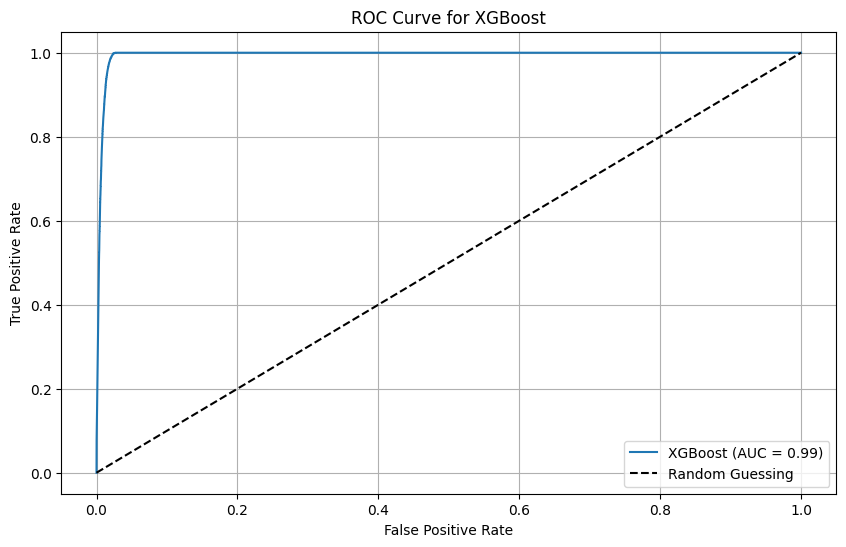

In [ ]:
fpr, tpr, _ = roc_curve(y_test, xgb_probs)
auc_score = roc_auc_score(y_test, xgb_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.grid()
plt.show()

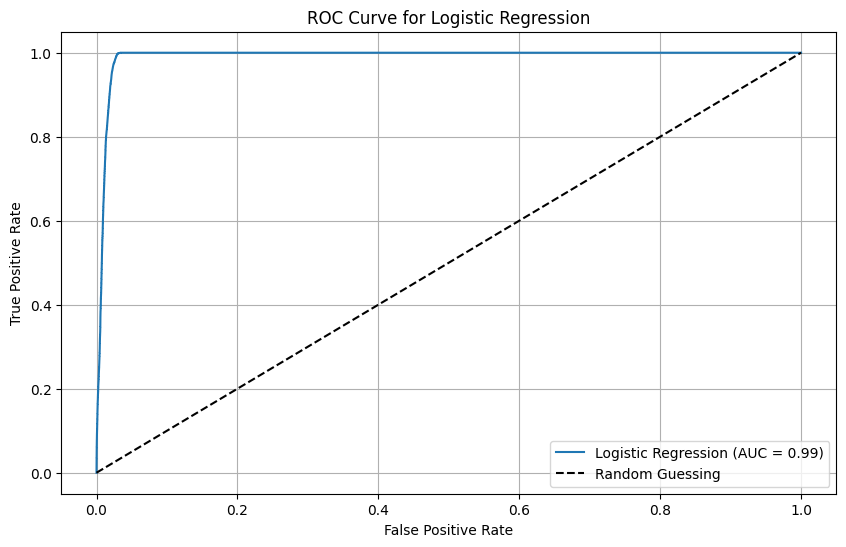

In [ ]:
fpr, tpr, _ = roc_curve(y_test, log_probs)
auc_score = roc_auc_score(y_test, log_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

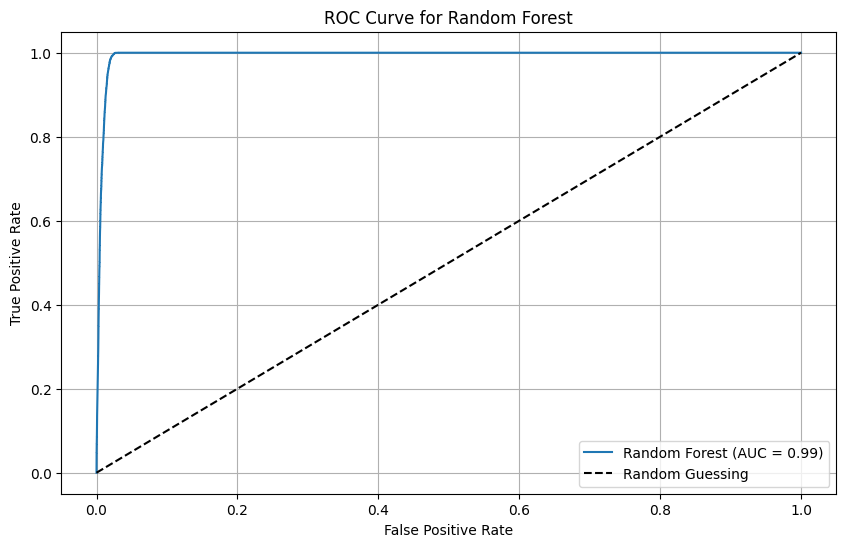

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf_probs)
auc_score = roc_auc_score(y_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.grid()
plt.show()

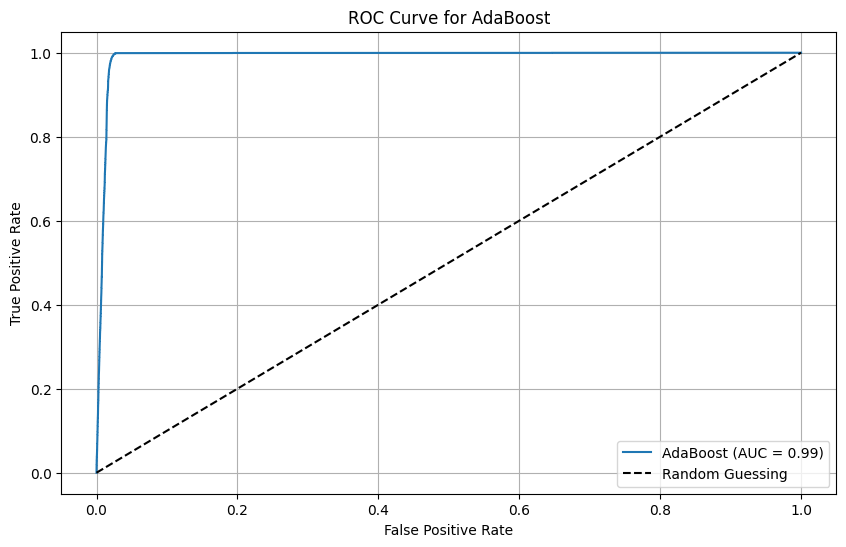

In [ ]:
fpr, tpr, _ = roc_curve(y_test, ada_probs)
auc_score = roc_auc_score(y_test, ada_probs)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
import numpy as np

# XGBoost
xgb_model = XGBClassifier(objective='binary:logistic')

# Random Forest
rf_model = RandomForestClassifier()

# AdaBoost
ada_model = AdaBoostClassifier()

# Define parameter grids for tuning
param_dist_xgb = {
    'n_estimators': np.arange(100, 300, 50),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': np.arange(3, 10, 2),
    'subsample': [0.8, 1.0]
}

param_dist_rf = {
    'n_estimators': np.arange(100, 300, 50),
    'max_depth': np.arange(5, 15, 2),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 1),
    'bootstrap': [True, False]
}

param_dist_ada = {
    'n_estimators': np.arange(50, 200, 50),
    'learning_rate': [0.01, 0.1, 0.2]
}

# RandomizedSearchCV setup for each model
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                       n_iter=20, scoring='recall',  # Maximize recall for class 1
                                       cv=5, verbose=1, n_jobs=-1)

random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf,
                                      n_iter=20, scoring='recall',
                                      cv=5, verbose=1, n_jobs=-1)

random_search_ada = RandomizedSearchCV(estimator=ada_model, param_distributions=param_dist_ada,
                                       n_iter=20, scoring='recall',
                                       cv=5, verbose=1, n_jobs=-1)

# Fit the models
random_search_xgb.fit(X_train, y_train)
random_search_rf.fit(X_train, y_train)
random_search_ada.fit(X_train, y_train)

# Extract best estimators
best_xgb = random_search_xgb.best_estimator_
best_rf = random_search_rf.best_estimator_
best_ada = random_search_ada.best_estimator_

# Predictions on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_ada = best_ada.predict(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} ===")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print(f"Recall for class '1': {recall_score(y_true, y_pred, pos_label=1)}")
    print()

# Evaluate all three models
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_ada, "AdaBoost")

# Print the best hyperparameters
print("Best XGBoost Parameters:", random_search_xgb.best_params_)
print("Best Random Forest Parameters:", random_search_rf.best_params_)
print("Best AdaBoost Parameters:", random_search_ada.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
=== XGBoost ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     87388
           1       0.85      0.97      0.91      8611

    accuracy                           0.98     95999
   macro avg       0.93      0.98      0.95     95999
weighted avg       0.98      0.98      0.98     95999

Confusion Matrix:
[[85972  1416]
 [  281  8330]]
Recall for class '1': 0.9673673208686564

=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     87388
           1       0.86      0.95      0.90      8611

    accuracy                           0.98     95999
   macro avg       0.93      0.97      0.95     95999
weighted avg       0.98      0.98      0.9

In [ ]:
accuracy = accuracy_score(y_test,y_pred_xgb)
print(f"Accuracy XGBoost: {accuracy:.2f}")

Accuracy XGBoost: 0.98


In [ ]:
accuracy = accuracy_score(y_test,y_pred_rf)
print(f"Accuracy Random Forest: {accuracy:.2f}")

Accuracy Random Forest: 0.98


In [ ]:
accuracy = accuracy_score(y_test,y_pred_ada)
print(f"Accuracy AdaBoost: {accuracy:.2f}")

Accuracy AdaBoost: 0.97


In [207]:
model=XGBClassifier({'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2})

In [208]:
GST.columns


Index(['ID', 'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'target', 'zscore'],
      dtype='object')

In [209]:

GST.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479993 entries, 3 to 785125
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        479993 non-null  object 
 1   Column0   479993 non-null  float64
 2   Column1   479993 non-null  int64  
 3   Column2   479993 non-null  float64
 4   Column3   479993 non-null  float64
 5   Column4   479993 non-null  float64
 6   Column5   479993 non-null  float64
 7   Column6   479993 non-null  float64
 8   Column7   479993 non-null  float64
 9   Column8   479993 non-null  float64
 10  Column9   479993 non-null  float64
 11  Column10  479993 non-null  int64  
 12  Column11  479993 non-null  int64  
 13  Column12  479993 non-null  int64  
 14  Column13  479993 non-null  int64  
 15  Column14  479993 non-null  float64
 16  Column15  479993 non-null  float64
 17  Column16  479993 non-null  float64
 18  Column17  479993 non-null  int64  
 19  Column18  479993 non-null  float64
 20  Column19 

In [210]:
X=GST.drop(['ID','zscore','target'],axis=1)
y=GST.target

In [211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479993 entries, 3 to 785125
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   479993 non-null  float64
 1   Column1   479993 non-null  int64  
 2   Column2   479993 non-null  float64
 3   Column3   479993 non-null  float64
 4   Column4   479993 non-null  float64
 5   Column5   479993 non-null  float64
 6   Column6   479993 non-null  float64
 7   Column7   479993 non-null  float64
 8   Column8   479993 non-null  float64
 9   Column9   479993 non-null  float64
 10  Column10  479993 non-null  int64  
 11  Column11  479993 non-null  int64  
 12  Column12  479993 non-null  int64  
 13  Column13  479993 non-null  int64  
 14  Column14  479993 non-null  float64
 15  Column15  479993 non-null  float64
 16  Column16  479993 non-null  float64
 17  Column17  479993 non-null  int64  
 18  Column18  479993 non-null  float64
 19  Column19  479993 non-null  int64  
 20  Column20 

In [212]:
numeric_features = X.select_dtypes(include=['number']).columns.tolist()

In [213]:
# Preprocessing for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [214]:
model_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',XGBClassifier(subsample=0.8,n_estimators= 100, max_depth=3, learning_rate=0.2))
])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Column0', 'Column1',
                                                   'Column2', 'Column3',
                                                   'Column4', 'Column5',
                                                   'Column6', 'Column7',
                                                   'Column8', 'Column9',
                                                   'Column10', 'Column11',
                                                   'Column12', 'Column13',
                                                   'Column14', 'Column15',
                                                   'Column16', 'Column17',
                                                   'Column18', 'Column19',
                                                   'Column20', 'Column21'])])),
                ('model',
                 XGBClassifier(b...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [217]:

X_train.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
422008,2.0,1148,4738.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,-0.08182,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
222451,0.0,972,5060.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.640991,-0.08182,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
102526,2.0,1701,407.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,-0.08182,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
40847,1.0,2495,6673.0,0.678139,0.701403,-0.007468,-0.407939,0.172213,0.354671,-0.08182,...,0,1,0.001351,0.00339,0.0,0,0.0,0,0,0
113530,1.0,1255,817.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.285039,-0.08269,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0


In [218]:
joblib.dump(model_pipeline,'model_pipeline_final_GST.joblib')

['model_pipeline_final_GST.joblib']

In [219]:
loaded_pipeline=joblib.load('model_pipeline_final_GST.joblib')

In [220]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383994 entries, 422008 to 199081
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   383994 non-null  float64
 1   Column1   383994 non-null  int64  
 2   Column2   383994 non-null  float64
 3   Column3   383994 non-null  float64
 4   Column4   383994 non-null  float64
 5   Column5   383994 non-null  float64
 6   Column6   383994 non-null  float64
 7   Column7   383994 non-null  float64
 8   Column8   383994 non-null  float64
 9   Column9   383994 non-null  float64
 10  Column10  383994 non-null  int64  
 11  Column11  383994 non-null  int64  
 12  Column12  383994 non-null  int64  
 13  Column13  383994 non-null  int64  
 14  Column14  383994 non-null  float64
 15  Column15  383994 non-null  float64
 16  Column16  383994 non-null  float64
 17  Column17  383994 non-null  int64  
 18  Column18  383994 non-null  float64
 19  Column19  383994 non-null  int64  
 20  Colu